<a href="https://colab.research.google.com/github/SevillaBK/Tensorflow2.0/blob/master/Chapter_6_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

컨볼루션 신경망의 성능을 높이기 위해서 사용되는 방법에 대해 알아보겠습니다.<br/>
대표적으로 쓰이는 두 방법은 **레이어 많이 쌓기**와 **이미지 보강(Image Augmentation)**입니다.

# 1. 더 많은 레이어 쌓기

딥러닝에서 네트워크의 구조를 깊게 쌓는 것이 가능해진 후 컨볼루션 신경망에서는 컨볼루션 레이어가<br/>
중첩된 더 깊은 구조가 계속해서 나타났고, 그 때마다 퍼포먼스가 개선되었습니다.

아래에서는 깊은 컨볼루션 레이어를 쌓는 방법 중 하나인 **VGGNet**의 스타일의 신경망으로<br/>
Fashion MNIST 데이터셋에 적용해보겠습니다.

In [1]:
# 텐서플로 불러오기
import tensorflow as tf

# Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# 데이터 스케일링
train_X = train_X / 255.0
test_X = test_X / 255.0

# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [2]:
# VGGNet 스타일의 콘볼루션 신경망 모델
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

VGGNet은 여러 구조로 실험했는데 그 중 19개의 레이어가 겹쳐진 VGG-19가 제일 깊은 구조입니다.<br/>
VGG-19는 초반에 컨볼루션 레이어를 2개 겹친 뒤 풀링레이어 1개를 사용하는 패턴을 2차례,<br/>
그 후 컨볼루션 레이어를 4개 겹친 뒤 풀링 레이어를 1개 사용하는 패턴을 3차례 반복합니다.

![alt text](https://github.com/injo-image/image/blob/master/tensorflow/chapter6/VGG-19.png?raw=true)

이번에 사용한 모델은 이미지가 작기도 하고, 연산 능력의 효율 상 간략하게 사용했습니다.<br/>
사용된 컨볼루션 레이어와 Dense 레이어의 개수를 세면 VGG-7 정도라 할 수 있습니다.

Epoch 1/25
1407/1407 [==============================] - 15s 11ms/step - loss: 0.5874 - accuracy: 0.7868 - val_loss: 0.3388 - val_accuracy: 0.8761
Epoch 2/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.3677 - accuracy: 0.8680 - val_loss: 0.2836 - val_accuracy: 0.8961
Epoch 3/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.3223 - accuracy: 0.8858 - val_loss: 0.2742 - val_accuracy: 0.9021
Epoch 4/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.3031 - accuracy: 0.8912 - val_loss: 0.2458 - val_accuracy: 0.9115
Epoch 5/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2827 - accuracy: 0.8974 - val_loss: 0.2333 - val_accuracy: 0.9131
Epoch 6/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2777 - accuracy: 0.9008 - val_loss: 0.2252 - val_accuracy: 0.9175
Epoch 7/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2703 - accuracy: 0.9040 - val_loss: 0.2237 -

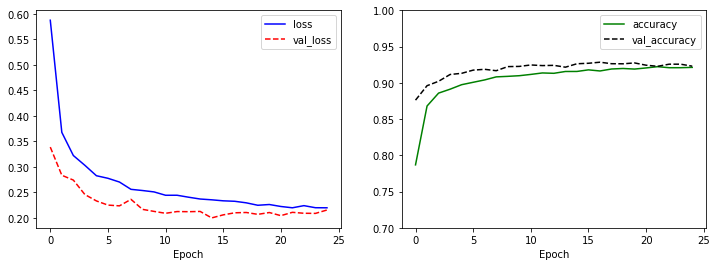

[0.23241497576236725, 0.9211999773979187]

In [3]:
# VGGNet 스타일의 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

시각화된 학습결과를 보니 val_loss가 증가하는 현상이 나타나지 않습니다. 아직 과적합되지 않아 에포크 수를 더 늘릴 수 있을 것 같습니다.<br/>
테스트 데이터에 대한 분류 정확도도 92%로 꽤 높게 나왔습니다.

# 2. 이미지 보강

**이미지보강(Image Augmentation)**은 훈련 데이터 이미지를 기반으로 변형된 이미지 데이터를 새롭게 만들어 훈련 데이터를 보강하는 것입니다.<br/>

텐서플로에서는 **ImageDataGenerator**를 활용하여 이미지 보강을 할 수 있습니다.

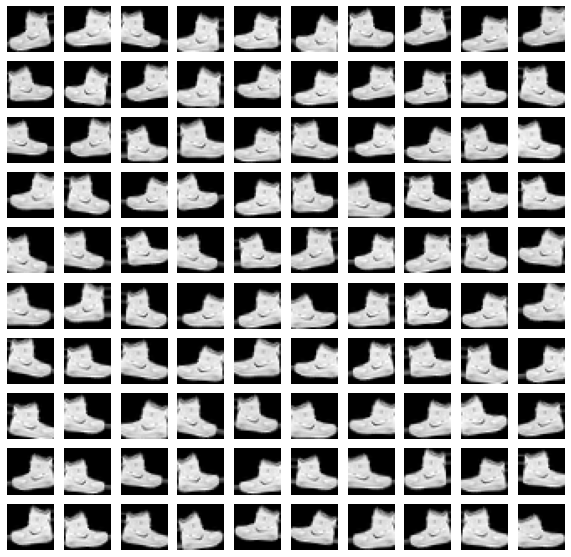

In [6]:
# ImageDataGenerator를 활용한 이미지 보강 및 보강된 이미지 표시
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1,28,28,1),
                                   np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]
# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for c in range(100):
  plt.subplot(10,10,c+1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

코드 실행 결과, 신발 이미지가 여러 형태로 조금씩 변형된 것을 확인할 수 있습니다.

## ImageDataGenerator 함수의 인자

* `rescale` : 이미지의 픽셀 값 조정
* `rotation_range` : 이미지 회전
* `width_shift_range` : 가로방향 이동
* `height_shift_range` : 세로방향 이동
* `zoom_range` : 이미지 확대
* `shear_range` : 이미지 굴절
* `horizontal_flip` : 횡방향 이미지 반전
* `vertical_flip` : 종방향 이미지 반전
* `fill_mode` : 이미지를 이동 굴절시켰을 때 빈 픽셀값을 채우는 방식

In [0]:
ImageDataGenerator()